In [1]:
import sys 
import os
sys.path.append(os.path.abspath("/Users/mouginot/work/helpmetric"))
import cymetrichelper as cyh
import pandahelper as pdh


import cymetric as cym
import pandas as pd
import matplotlib.pyplot as plt
from cymetric import graphs as cgr
from cymetric import timeseries as tm

%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


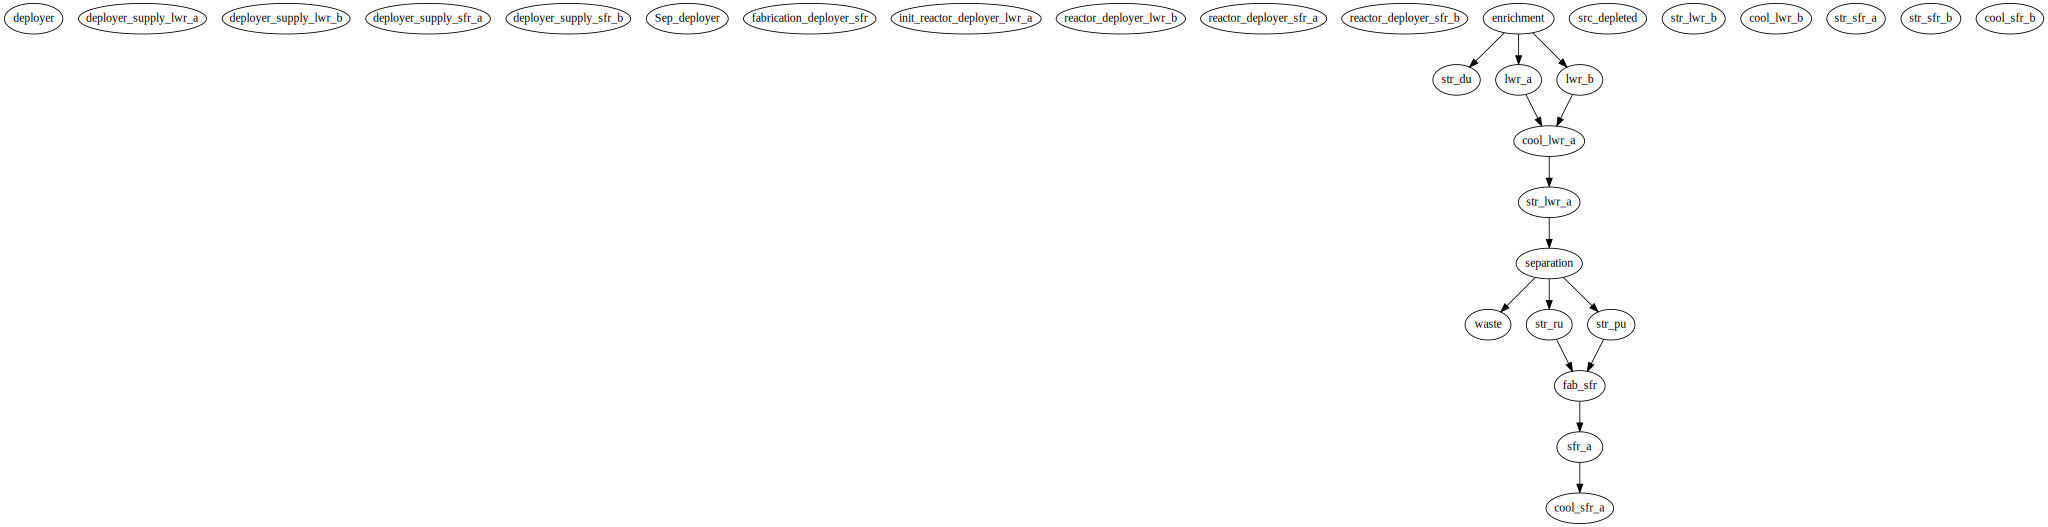

In [2]:
cyh.MakeFlowGraph("main.sqlite")



In [2]:
db = cym.dbopen("main.sqlite")
ev = cym.Evaluator(db=db, write=False)

In [4]:
rec = ()

send = ['sfr_a','sfr_b']
nucs = ()
coms = ()


df1 = tm.transactions(ev, receivers=rec, senders=send, nucs=nucs, commodities=coms)



In [5]:
def month2year(df, mode=0, division=12):
    dfn = pd.DataFrame(columns=['Time','Mass'])
    df.rename(index=str, columns={"Quantity": "Mass"})
    val = 0
    for index, row in df.iterrows():
        if mode == 0:
            val = row['Mass']
        else:
            val += row['Mass']
        if row['Time'] % division == 0:
            if mode == 2:
                val *= 1./float(division)
            dfn.loc[int(row['Time'] / division)] = int(row['Time'] / 12)
            dfn.loc[int(row['Time'] / division)]['Mass'] = val
            val = 0
    return dfn
            
    
    
def maxperdiv(df, division=12):
    dfn = pd.DataFrame(columns=['Time','Mass'])
    val = 0
    for index, row in df.iterrows():
        if val < row['Mass']:
            val = row['Mass']
        if row['Time'] % division == 0:
            dfn.loc[int(row['Time'] / division)] = int(row['Time'] / 12)
            dfn.loc[int(row['Time'] / division)]['Mass'] = val
            val = 0
    return dfn

def increaseonly(df):
    dfn = pd.DataFrame(columns=['Time','Mass'])
    val = 0
    for index, row in df.iterrows():
        if val < row['Mass']:
            val = row['Mass']
            dfn.loc[int(row['Time'])] = int(row['Time'])
            dfn.loc[int(row['Time'])]['Mass'] = row['Mass']
            val = row['Mass']
    return dfn

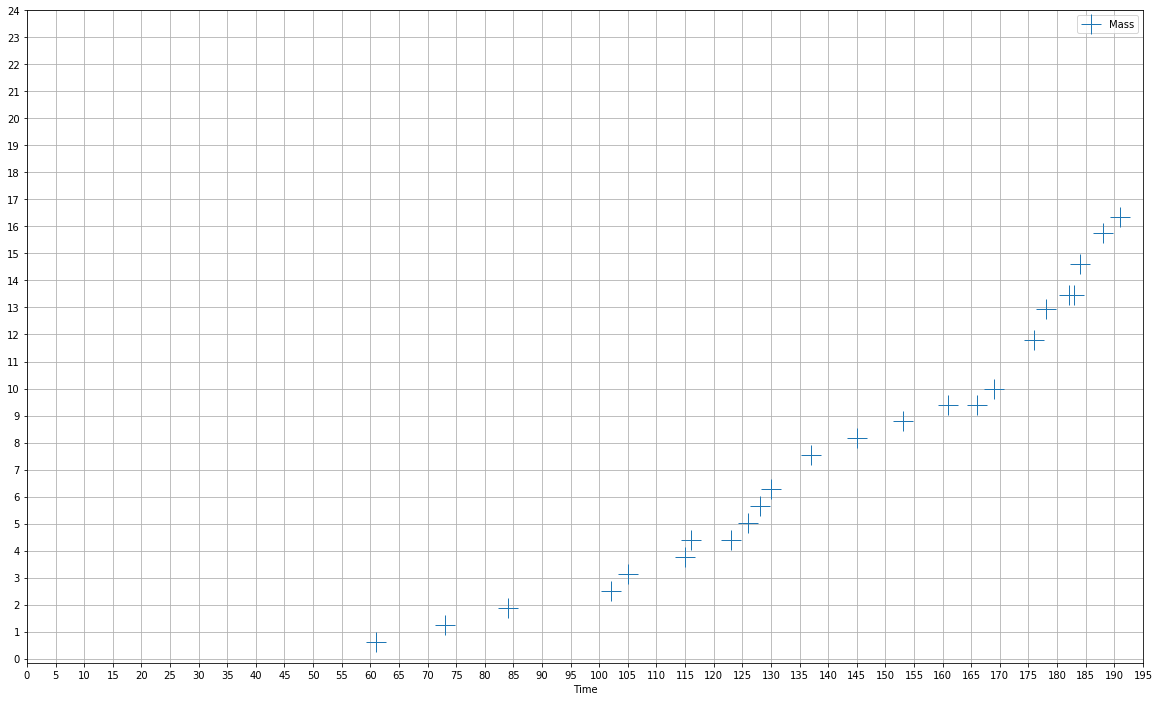

In [6]:
df1_y = increaseonly(maxperdiv(df1,12))
df1_y['Mass'] = df1_y['Mass']/20000.

ax = df1_y.plot('Time','Mass',linestyle='', marker='+', markersize='20' ,figsize = (20,12))
# Major ticks every 20, minor ticks every 5
import numpy as np
major_y_ticks = np.arange(0, 25, 1)

ax.set_yticks(major_y_ticks)
major_x_ticks = np.arange(0, 200, 5)
ax.set_xticks(major_x_ticks)



# And a corresponding grid
ax.grid(which='both')

plt.show()

In [7]:
df1_y_unit = pd.DataFrame()

df1_y_unit['Time'] = df1_y['Time']
df1_y_build_unit = pd.DataFrame()
df1_y_unit['Unit'] = df1_y['Mass']


df1_y_unit['Unit'] = df1_y_unit['Unit'].apply(lambda x: int(x) + 1 if x > int(x) else int(x))


df1_y_build_unit['Time'] = df1_y_unit['Time']
df1_y_build_unit['Build'] = (df1_y_unit['Unit'] - df1_y_unit['Unit'].shift(1))
df1_y_build_unit= df1_y_build_unit.dropna()

#df1_y_build_unit['Build'] = df1_y_build_unit['Build'].apply(lambda x: int(x) + 1 if x > int(x) else int(x))
df1_y_build_unit = df1_y_build_unit.loc[df1_y_build_unit.Build>0]
df1_y_build_unit['Time'] *= 12.
print(df1_y_build_unit['Time'].values-12.)
print(df1_y_build_unit['Build'].values)

#### REMEMBER to add the first step !!

[864.0 1212.0 1248.0 1380.0 1500.0 1548.0 1632.0 1728.0 1920.0 2100.0
 2124.0 2172.0 2196.0 2244.0 2280.0]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1.]


In [8]:

df1_y_build_unit['Build'].sum()

16.0

In [3]:
dfp = tm.get_power(ev)

/Users/mouginot/.local/lib/python3.5/site-packages/cymetric/timeseries.py:226: UserWarning: no faciity provided
  warnings.warn(wng_msg, UserWarning)


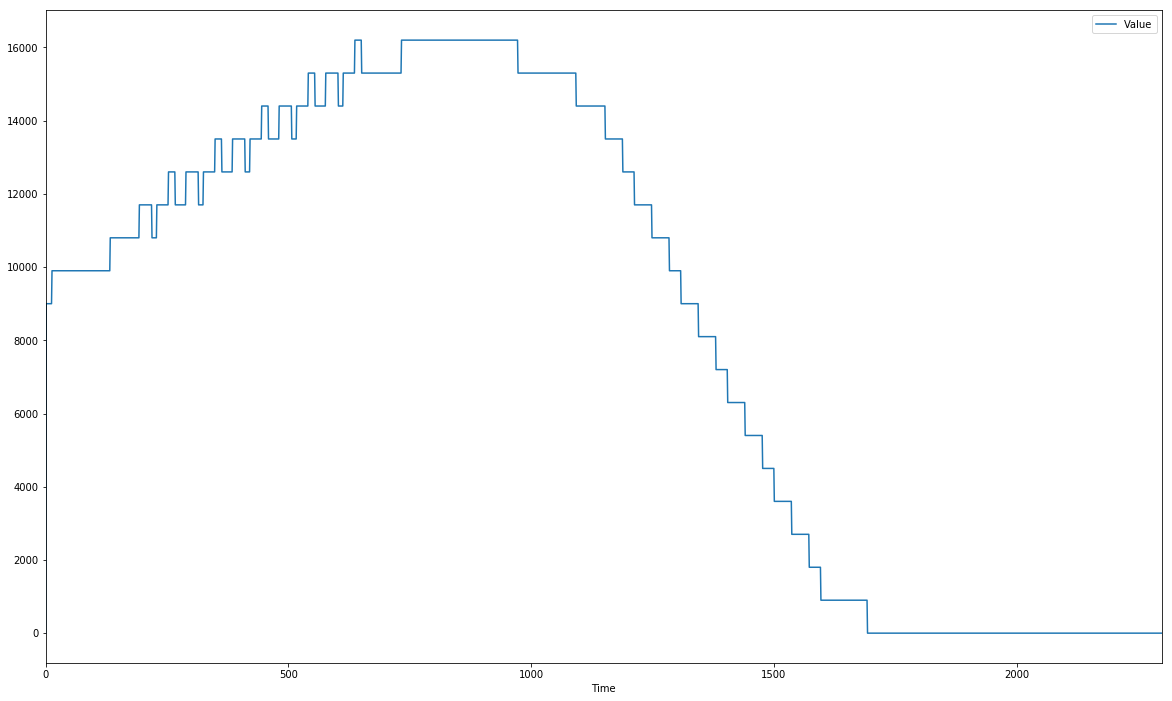

In [4]:
dfp.plot('Time','Value',figsize = (20,12))

In [11]:
rec = ['fab_sfr_a']

send = ['str_pu']
nucs = ()
coms = ()


df2 = tm.transactions(ev, receivers=rec, senders=send, nucs=nucs, commodities=coms)




ValueError: can not merge DataFrame with instance of type <class 'NoneType'>

In [ ]:
df2_y = df2.copy()
df2
df2_y = increaseonly(df2_y.loc[df2_y.Mass<140000])
#df2_y['Time'] *= 1/12.
df2_y['Mass'] = df2_y['Mass']/20000
ax = df2_y.plot('Time','Mass',linestyle='', marker='+', markersize='20' ,figsize = (20,12))
# Major ticks every 20, minor ticks every 5
import numpy as np
major_y_ticks = np.arange(0, 20, 1)

ax.set_yticks(major_y_ticks)
major_x_ticks = np.arange(0, 200*12, 5*12)
ax.set_xticks(major_x_ticks)

# And a corresponding grid
ax.grid(which='both')

plt.show()

In [ ]:
df2_y_unit = pd.DataFrame()

df2_y_unit['Time'] = df2_y['Time']
df2_y_build_unit = pd.DataFrame()
df2_y_unit['Unit'] = df2_y['Mass']


df2_y_unit['Unit'] = df2_y_unit['Unit'].apply(lambda x: int(x) + 1 if x > int(x) else int(x))


df2_y_build_unit['Time'] = df2_y_unit['Time']
df2_y_build_unit['Build'] = (df2_y_unit['Unit'] - df2_y_unit['Unit'].shift(1))
df2_y_build_unit= df2_y_build_unit.dropna()

#df2_y_build_unit['Build'] = df2_y_build_unit['Build'].apply(lambda x: int(x) + 1 if x > int(x) else int(x))
df2_y_build_unit = df2_y_build_unit.loc[df2_y_build_unit.Build>0]
#df2_y_build_unit['Time'] *= 12.
print(df2_y_build_unit['Time'].values-12.*2)
print(df2_y_build_unit['Build'].values)

#### REMEMBER to add the first step !!

In [ ]:
df2_y_build_unit['Build'].sum()

In [ ]:
fac = ['str_pu']
nucs = ()
coms = ()


df3 = tm.inventories(ev, facilities=fac)

In [ ]:
df3_y_m = df3
df3_y_m['Quantity'] = df3
ax = df3_y_m.plot('Time','Quantity',linestyle='', marker='+', markersize='20' ,figsize = (20,12))
# Major ticks every 20, minor ticks every 5
import numpy as np
major_y_ticks = np.arange(0, 60, 1)

ax.set_yticks(major_y_ticks)
major_x_ticks = np.arange(0, 200, 5)
ax.set_xticks(major_x_ticks)



# And a corresponding grid
ax.grid(which='both')

plt.show()

In [ ]:
df3